In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.backend import clear_session

In [0]:
year1 = pd.read_csv('year1.csv', na_values= '?')
year2 = pd.read_csv('year2.csv', na_values= '?')
year3 = pd.read_csv('year3.csv', na_values= '?')
year4 = pd.read_csv('year4.csv', na_values= '?')
year5 = pd.read_csv('year5.csv', na_values= '?')

In [0]:
data = pd.concat([year1,year2,year3,year4,year5], ignore_index=True)

In [0]:
data = data.dropna()
data_y = data[data.columns.tolist()[-1]]
data_x = data[data.columns.tolist()[:-1]]
data_x = (data_x - data_x.mean()) / (data_x.std())


In [0]:


vec = data_y == 0
ceros = data_x[vec]
ceros = ceros[:432]
unos = data_x[data_y==1]

X = pd.concat([ceros,unos], ignore_index=True)
Y = pd.concat([pd.Series(np.zeros(432)), pd.Series(np.ones(432))],ignore_index=True)



train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3)
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5)



In [0]:
stop = EarlyStopping(monitor='val_loss', patience=10)
model = Sequential()
model.add(Dense(10, input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model.fit(train_x, train_y,validation_data=(val_x, val_y), epochs=200, batch_size=20, shuffle=True, callbacks=[stop])
model.save('b10_10.h5')

Train on 604 samples, validate on 130 samples
Epoch 1/200
604/604 [==============================] - 0s 678us/sample - loss: 0.7399 - acc: 0.3891 - val_loss: 0.6818 - val_acc: 0.5154
Epoch 2/200
604/604 [==============================] - 0s 94us/sample - loss: 0.6506 - acc: 0.6689 - val_loss: 0.6127 - val_acc: 0.7308
Epoch 3/200
604/604 [==============================] - 0s 101us/sample - loss: 0.5740 - acc: 0.7864 - val_loss: 0.5554 - val_acc: 0.7538
Epoch 4/200
604/604 [==============================] - 0s 123us/sample - loss: 0.5175 - acc: 0.8013 - val_loss: 0.5103 - val_acc: 0.8077
Epoch 5/200
604/604 [==============================] - 0s 104us/sample - loss: 0.4742 - acc: 0.8195 - val_loss: 0.4776 - val_acc: 0.7846
Epoch 6/200
604/604 [==============================] - 0s 101us/sample - loss: 0.4420 - acc: 0.8228 - val_loss: 0.4519 - val_acc: 0.8000
Epoch 7/200
604/604 [==============================] - 0s 97us/sample - loss: 0.4181 - acc: 0.8311 - val_loss: 0.4342 - val_acc: 0.80

In [0]:
model = load_model('b10_10.h5')

unos = test_x[test_y == 1]
ceros = test_x[test_y == 0]

print(test_x.shape)

model.evaluate(unos, np.ones(unos.shape[0]))
model.evaluate(ceros, np.zeros(ceros.shape[0]))

(130, 64)
62/62 [==============================] - 0s 67us/sample - loss: 1.3465 - acc: 0.7419


[1.3464954591566516, 0.7419355]

**AÑO 1**

In [0]:
year1dropped = year1.drop(columns=['param21', 'param27', 'param37'])
year1dropped_na = year1dropped.dropna()

def train_year1(i):
  year1_y = year1dropped_na[year1dropped_na.columns.tolist()[-1]]
  year1_x = year1dropped_na[year1dropped_na.columns.tolist()[:-1]]
  year1_x = (year1_x - year1_x.mean()) / (year1_x.std())

  unos_totales = 218
  unos_test = 10
  random_indexes = np.random.choice(unos_totales, unos_totales-unos_test, replace=False)
  cortar_por_lo_sano = (unos_totales - unos_test) * 4
  corte_x = 1600

  vec = year1_y == 0
  ceros = year1_x[vec]
  ceros = ceros[:corte_x]
  unos = year1_x[year1_y==1]

  unos = unos.iloc[random_indexes]

  unos = pd.concat([unos, unos, unos, unos], ignore_index=True)

  X = pd.concat([ceros,unos], ignore_index=True)
  Y = pd.concat([pd.Series(np.zeros(corte_x)),
                 pd.Series(np.ones(cortar_por_lo_sano))],ignore_index=True)



  train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.2)

  stop = EarlyStopping(monitor='val_loss', patience=10)
  model = Sequential()
  model.add(Dense(10, input_shape=(61,), activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

  model.fit(train_x, train_y,validation_data=(test_x, test_y), epochs=400,
            batch_size=20, shuffle=True, callbacks=[stop])
  model.save('year1_b10_20_{}_v4.h5'.format(i))
  clear_session()

In [0]:
def test_year1(i):
  model = load_model('year1_b10_20_{}_v4.h5'.format(i))

  ceros = year1_x[vec]
  ceros = ceros[corte_x:]

  unos = year1_x[year1_y==1].values
#   print(unos.shape)
  unos = np.array([x for i, x in enumerate(unos) if i not in random_indexes])
#   print(unos.shape)
  ceros_totales = 6361

  pred_unos = model.evaluate(unos, np.ones(unos_test))
  pred_ceros = model.evaluate(ceros, np.zeros(ceros_totales-corte_x))

#   plt.hist(np.round(pred, 0))
#   plt.show()
  
  clear_session()
  
  return pred_unos, pred_ceros

# print(year1_x[year1_y==1])

In [0]:
total_pred_unos = []
total_pred_ceros = []

for i in np.arange(10):
  train_year1(i)
  pred_unos, pred_ceros = test_year1(i)
  total_pred_unos.append(pred_unos)
  total_pred_ceros.append(pred_ceros)

In [0]:
print(np.mean(np.array(total_pred_ceros), axis=0))
print(np.mean(np.array(total_pred_unos), axis=0))

[0.62821204 0.80258349]
[0.37226584 0.86      ]


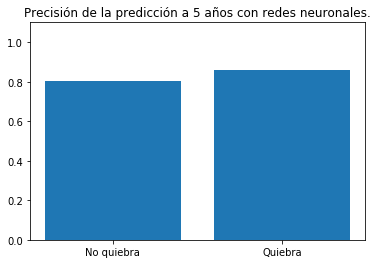

In [5]:
import matplotlib.pyplot as plt
import numpy as np

prec = [0.80258349, 0.86]
plt.bar(np.arange(2), prec, tick_label=['No quiebra', 'Quiebra'])
plt.title("Precisión de la predicción a 5 años con redes neuronales.")
axes = plt.gca()
axes.set_ylim([0, 1.1])
plt.show()

In [0]:
year2dropped = year2.drop(columns=['param21', 'param27', 'param37', 'param24', 'param28', 'param41', 'param45', 'param53', 'param54', 'param60', 'param64'])

year2dropped_na = year2dropped.dropna()

year2_y = year2dropped_na[year2dropped_na.columns.tolist()[-1]]
year2_x = year2dropped_na[year2dropped_na.columns.tolist()[:-1]]
year2_x = (year2_x - year2_x.mean()) / (year2_x.std())

unos_totales_2 = year2dropped_na[year2dropped_na.label == 1].shape[0]
  
unos_test_2 = 20
cortar_por_lo_sano_2 = (unos_totales_2 - unos_test_2) * 4
corte_x_2 = 1200

def train_year2(i):

  random_indexes_2 = np.random.choice(unos_totales_2, unos_totales_2-unos_test_2, replace=False)

  vec_2 = year2_y == 0
  ceros_2 = year2_x[vec_2]
  ceros_2 = ceros_2[:corte_x_2]
  unos_2 = year2_x[year2_y==1]

  unos_2 = unos_2.iloc[random_indexes_2]

  unos_2 = pd.concat([unos_2, unos_2, unos_2, unos_2], ignore_index=True)

  X_2 = pd.concat([ceros_2,unos_2], ignore_index=True)
  Y_2 = pd.concat([pd.Series(np.zeros(corte_x_2)),
                 pd.Series(np.ones(cortar_por_lo_sano_2))],ignore_index=True)



  train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(X_2, Y_2, test_size=0.2)

  stop = EarlyStopping(monitor='val_loss', patience=10)
  model = Sequential()
  model.add(Dense(100, input_shape=(year2dropped_na.shape[1]-1,), activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

  model.fit(train_x_2, train_y_2, validation_data=(test_x_2, test_y_2), epochs=400,
            batch_size=20, shuffle=True, callbacks=[stop])
  model.save('year2_b10_20_{}_v4.h5'.format(i))
  clear_session()
  
  return vec_2, random_indexes_2
  
def test_year2(i, vec_2, random_indexes_2):
  model = load_model('year2_b10_20_{}_v4.h5'.format(i))

  ceros_2 = year2_x[vec_2]
  ceros_2 = ceros_2[corte_x_2:]

  unos_2 = year2_x[year2_y==1].values
#   print(unos.shape)
  unos_2 = np.array([x for i, x in enumerate(unos_2) if i not in random_indexes_2])
#   print(unos.shape)
  ceros_totales_2 = year2dropped_na[year2dropped_na.label == 0].shape[0]

  pred_unos_2 = model.evaluate(unos_2, np.ones(unos_test_2))
  pred_ceros_2 = model.evaluate(ceros_2, np.zeros(ceros_totales_2-corte_x_2))
  
  clear_session()
  
  return pred_unos_2, pred_ceros_2

In [0]:
total_pred_unos_2 = []
total_pred_ceros_2 = []

# 80 40
# 300 150

for i in np.arange(2):
  vec_2, random_indexes_2 = train_year2(i)
  pred_unos_2, pred_ceros_2 = test_year2(i, vec_2, random_indexes_2)
  total_pred_unos_2.append(pred_unos_2)
  total_pred_ceros_2.append(pred_ceros_2)
  
print(np.mean(np.array(total_pred_ceros_2), axis=0))
print(np.mean(np.array(total_pred_unos_2), axis=0))

Train on 2144 samples, validate on 536 samples
Epoch 1/400
2144/2144 [==============================] - 0s 140us/sample - loss: 0.6528 - acc: 0.6376 - val_loss: 0.6255 - val_acc: 0.6716
Epoch 2/400
2144/2144 [==============================] - 0s 94us/sample - loss: 0.6066 - acc: 0.6800 - val_loss: 0.6148 - val_acc: 0.6884
Epoch 3/400
2144/2144 [==============================] - 0s 91us/sample - loss: 0.5911 - acc: 0.6940 - val_loss: 0.6014 - val_acc: 0.6828
Epoch 4/400
2144/2144 [==============================] - 0s 89us/sample - loss: 0.5794 - acc: 0.7015 - val_loss: 0.6061 - val_acc: 0.6884
Epoch 5/400
2144/2144 [==============================] - 0s 91us/sample - loss: 0.5743 - acc: 0.7034 - val_loss: 0.5965 - val_acc: 0.6847
Epoch 6/400
2144/2144 [==============================] - 0s 94us/sample - loss: 0.5631 - acc: 0.7108 - val_loss: 0.5859 - val_acc: 0.6866
Epoch 7/400
2144/2144 [==============================] - 0s 92us/sample - loss: 0.5534 - acc: 0.7197 - val_loss: 0.5996 - va

In [0]:
a = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
b = [2, 4, 3]
c = [x for i, x in enumerate(a) if i not in b]
print(c)

[[1, 2], [2, 4]]
